# This notebook is purely for testing purposes. It is not part of the project.


In [143]:
# import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
sys.path.append('../')
from Constants import Constants

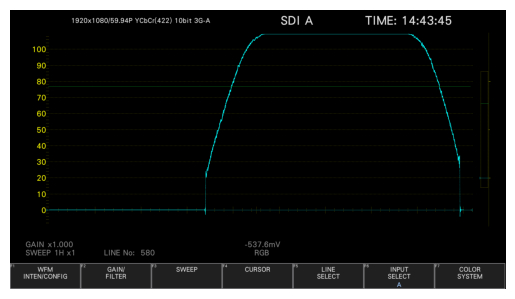

In [144]:
sample_image = cv2.imread(Constants.LOCAL_FILE_PATH_BMP)
sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)

# display the image
plt.imshow(sample_image)
# turn off axis
plt.axis("off")
plt.show()


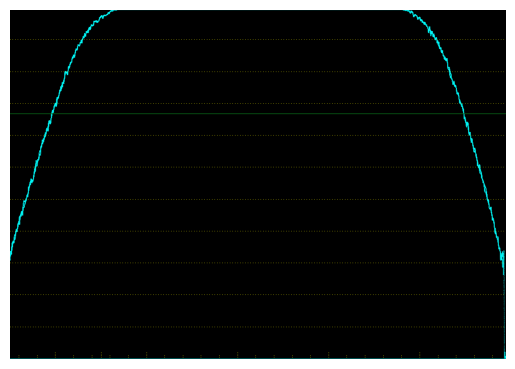

In [158]:
# crop to region of interest
roi = sample_image[92:775,775:1745] # isolate the waveform
# display the image
plt.imshow(roi)
# turn off axis
plt.axis("off")
plt.show()


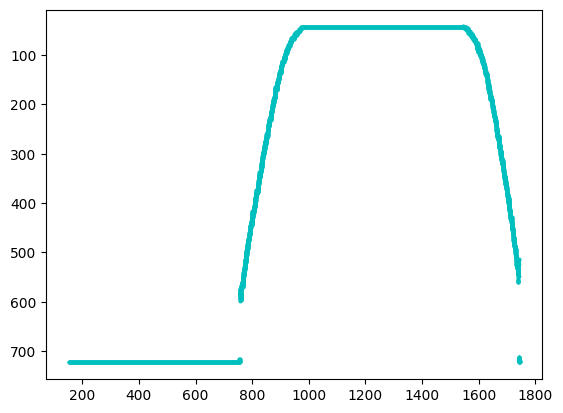

In [146]:
data = np.array(roi)


lower_cyan_range = np.array([0, 200, 200])
upper_cyan_range = np.array([100, 255, 255])

# get cyan coordinates
cyan_mask = cv2.inRange(data, lower_cyan_range, upper_cyan_range)
cyan_coordinates = np.where(cyan_mask == 255)
cyan_coordinates = np.array(cyan_coordinates)

# Plot the cyan pixel locations
plt.scatter(cyan_coordinates[1], cyan_coordinates[0], c='c', s=3)

# Invert the y axis, because the origin is at the top left corner in an image
plt.gca().invert_yaxis()

# Show the plot
plt.show()

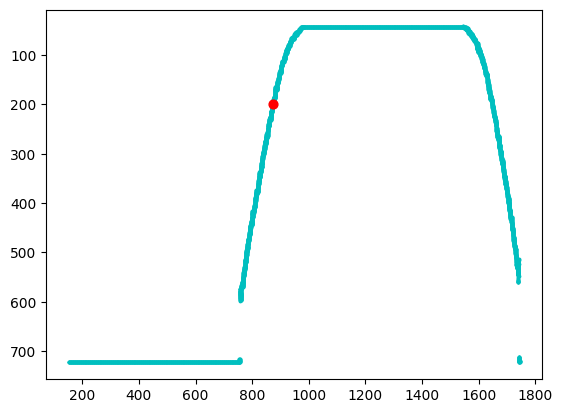

Middle cyan pixel's x value: 872
Middle cyan pixel's y value: 199


In [147]:
# find the middle point's x value of the whole image
middle_point = int(data.shape[1]/2)

# find the corresponding cyan pixel in the middle point
middle_cyan_pixel = np.where(cyan_coordinates[1] == middle_point)[0][0]


# mark the middle cyan pixel on the plot toether with the other cyan pixels
plt.scatter(cyan_coordinates[1], cyan_coordinates[0], c='c', s=3)
# Invert the y axis, because the origin is at the top left corner in an image
plt.gca().invert_yaxis()
# mark the middle cyan pixel
plt.scatter(cyan_coordinates[1][middle_cyan_pixel], cyan_coordinates[0][middle_cyan_pixel], c='r', s=40)
# Show the plot
plt.show()

# print the middle cyan pixel's x and y values
print(f"Middle cyan pixel's x value: {cyan_coordinates[1][middle_cyan_pixel]}")
print(f"Middle cyan pixel's y value: {cyan_coordinates[0][middle_cyan_pixel]}")





In [148]:
mid_cyan_y = cyan_coordinates[0][middle_cyan_pixel]

print(type(mid_cyan_y))
print(mid_cyan_y)

# print data shape
print(data.shape)

# convet the y value to target level
target_level = (1-mid_cyan_y/float(data.shape[0]))* 10000
target_level = int(target_level)

print(f"Target level: {target_level}")


<class 'numpy.int64'>
199
(725, 1745, 3)
Target level: 7255
